**MACHINE LEARNING COURSEWORK - REGRESSION**

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
from sklearn.svm import SVR 
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
import pickle

warnings.filterwarnings('ignore') #ignore warning messages

In [2]:
dataset = pd.read_excel("TrainDataset2023.xls")
dataset.head()

ID  pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  \
0  TRG002174              1                          144.0  41.0   0    0   
1  TRG002178              0                          142.0  39.0   1    1   
2  TRG002204              1                          135.0  31.0   0    0   
3  TRG002206              0                           12.0  35.0   0    0   
4  TRG002210              0                          109.0  61.0   1    0   

   HER2  TrippleNegative  ChemoGrade  Proliferation  ...  \
0     0                1           3              3  ...   
1     0                0           3              3  ...   
2     0                1           2              1  ...   
3     0                1           3              3  ...   
4     0                0           2              1  ...   

   original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                       0.517172   
1                                       0.444391   
2                                       0.534549   
3                                       0.506185   
4                                       0.462282   

   original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                      0.375126                    3.325332   
1                                      0.444391                    3.032144   
2                                      0.534549                    2.485848   
3                                      0.506185                    2.606255   
4                                      0.462282                    2.809279   

   original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                       0.002314                  3880771.500   
1                       0.005612                  2372009.744   
2                       0.006752                  1540027.421   
3                       0.003755                  6936740.794   
4                       0.006521                  1265399.054   

   original_ngtdm_Busyness  original_ngtdm_Coarseness  \
0               473.464852                   0.000768   
1                59.459710                   0.004383   
2                33.935384                   0.007584   
3                46.859265                   0.005424   
4                39.621023                   0.006585   

   original_ngtdm_Complexity  original_ngtdm_Contrast  original_ngtdm_Strength  
0                   0.182615                 0.030508                 0.000758  
1                   0.032012                 0.001006                 0.003685  
2                   0.024062                 0.000529                 0.006447  
3                   0.013707                 0.000178                 0.004543  
4                   0.034148                 0.001083                 0.005626  

[5 rows x 120 columns]

In [3]:
df = dataset
df.shape

(400, 120)

In [4]:
df.describe()

pCR (outcome)  RelapseFreeSurvival (outcome)         Age          ER  \
count     400.000000                     400.000000  400.000000  400.000000   
mean       12.697500                      56.000208   51.804674    0.547500   
std       111.107417                      27.137584   10.948522    0.498362   
min         0.000000                       0.000000   23.000000    0.000000   
25%         0.000000                      38.000000   44.516769    0.000000   
50%         0.000000                      55.000000   51.019507    1.000000   
75%         0.000000                      73.000000   60.000000    1.000000   
max       999.000000                     144.000000   79.603012    1.000000   

              PgR        HER2  TrippleNegative  ChemoGrade  Proliferation  \
count  400.000000  400.000000       400.000000  400.000000     400.000000   
mean     2.902500    2.797500         2.830000    9.875000       6.562500   
std     49.932114   49.937068        49.935558   86.092911      70.444284   
min      0.000000    0.000000         0.000000    1.000000       1.000000   
25%      0.000000    0.000000         0.000000    2.000000       1.000000   
50%      0.000000    0.000000         0.000000    2.000000       1.000000   
75%      1.000000    1.000000         1.000000    3.000000       2.000000   
max    999.000000  999.000000       999.000000  999.000000     999.000000   

       HistologyType  ...  original_glszm_SmallAreaHighGrayLevelEmphasis  \
count      400.00000  ...                                   4.000000e+02   
mean         8.63250  ...                                   3.957637e-01   
std         86.20034  ...                                   1.666319e-01   
min          1.00000  ...                                   7.050000e-11   
25%          1.00000  ...                                   3.199017e-01   
50%          1.00000  ...                                   4.095627e-01   
75%          1.00000  ...                                   5.000049e-01   
max        999.00000  ...                                   8.773779e-01   

       original_glszm_SmallAreaLowGrayLevelEmphasis  \
count                                  4.000000e+02   
mean                                   3.911005e-01   
std                                    1.615922e-01   
min                                    7.050000e-11   
25%                                    3.184398e-01   
50%                                    4.054695e-01   
75%                                    4.956920e-01   
max                                    8.571429e-01   

       original_glszm_ZoneEntropy  original_glszm_ZonePercentage  \
count                4.000000e+02                     400.000000   
mean                 2.722189e+00                       0.003347   
std                  7.648849e-01                       0.002419   
min                 -3.200000e-16                       0.000008   
25%                  2.340783e+00                       0.001389   
50%                  2.814884e+00                       0.002944   
75%                  3.304411e+00                       0.004798   
max                  4.947427e+00                       0.011301   

       original_glszm_ZoneVariance  original_ngtdm_Busyness  \
count                 4.000000e+02               400.000000   
mean                  5.679717e+07               178.311246   
std                   7.063846e+08              1045.453432   
min                   0.000000e+00                 0.000000   
25%                   1.030473e+06                18.760570   
50%                   3.277334e+06                67.929659   
75%                   9.079686e+06               157.370294   
max                   1.390001e+10             20764.693790   

       original_ngtdm_Coarseness  original_ngtdm_Complexity  \
count                 400.000000                 400.000000   
mean                32500.032620                   0.056935   
std                177545.921568                  

In [5]:
df=df.replace(999, None)

In [6]:
#This part of the code is to visually represent the missing values in the data
null_feat = pd.DataFrame(len(df['ID']) - df.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [7]:
#Taking the first 12 columns in order to handle the missing values efficiently. 
#The rest columns are values derived from the image scans
# the ID column is not needed.

Df_ = df.iloc[:,1:13]

In [8]:
Df_.dtypes

pCR (outcome)                     object
RelapseFreeSurvival (outcome)    float64
Age                              float64
ER                                 int64
PgR                               object
HER2                              object
TrippleNegative                   object
ChemoGrade                        object
Proliferation                     object
HistologyType                     object
LNStatus                          object
TumourStage                        int64
dtype: object

In [9]:
# we do not handle missing values for the target variable
Df_outcome = Df_["RelapseFreeSurvival (outcome)"]
Df_ = Df_.drop("pCR (outcome)", axis = 1)
Df_ = Df_.drop("RelapseFreeSurvival (outcome)", axis = 1)

In [10]:
null_feat = pd.DataFrame(len(Df_['Age']) - Df_.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values in first 12 columns")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [11]:
columns = Df_.columns

In [12]:
columns

Index(['Age', 'ER', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade',
       'Proliferation', 'HistologyType', 'LNStatus', 'TumourStage'],
      dtype='object')

In [13]:
for col in Df_.columns:
    Df_[col].fillna(Df_[col].mode()[0], inplace=True)

null_feat = pd.DataFrame(len(Df_['Age']) - Df_.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "After treating missing values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [14]:
Df_.describe()

Age          ER         PgR        HER2  TrippleNegative  \
count  400.000000  400.000000  400.000000  400.000000       400.000000   
mean    51.804674    0.547500    0.405000    0.300000         0.332500   
std     10.948522    0.498362    0.491507    0.458831         0.471699   
min     23.000000    0.000000    0.000000    0.000000         0.000000   
25%     44.516769    0.000000    0.000000    0.000000         0.000000   
50%     51.019507    1.000000    0.000000    0.000000         0.000000   
75%     60.000000    1.000000    1.000000    1.000000         1.000000   
max     79.603012    1.000000    1.000000    1.000000         1.000000   

       ChemoGrade  Proliferation  HistologyType    LNStatus  TumourStage  
count  400.000000     400.000000     400.000000  400.000000   400.000000  
mean     2.397500       1.572500       1.147500    0.535000     2.607500  
std      0.500119       0.765643       0.355048    0.499398     0.897473  
min      1.000000       1.000000       1.000000    0.000000     1.000000  
25%      2.000000       1.000000       1.000000    0.000000     2.000000  
50%      2.000000       1.000000       1.000000    1.000000     2.000000  
75%      3.000000       2.000000       1.000000    1.000000     3.000000  
max      3.000000       3.000000       2.000000    1.000000     4.000000

In [15]:
#data after handling missing values
Df_concat1 = pd.concat((Df_outcome, Df_), axis=1)
Df_imputed = pd.concat((Df_concat1, df.iloc[:,13:]), axis=1)

In [16]:
Df_imputed.to_csv("treated_missing_vals2_regression_final.csv") 

In [17]:
Df_imputed.describe()

RelapseFreeSurvival (outcome)         Age          ER         PgR  \
count                     400.000000  400.000000  400.000000  400.000000   
mean                       56.000208   51.804674    0.547500    0.405000   
std                        27.137584   10.948522    0.498362    0.491507   
min                         0.000000   23.000000    0.000000    0.000000   
25%                        38.000000   44.516769    0.000000    0.000000   
50%                        55.000000   51.019507    1.000000    0.000000   
75%                        73.000000   60.000000    1.000000    1.000000   
max                       144.000000   79.603012    1.000000    1.000000   

             HER2  TrippleNegative  ChemoGrade  Proliferation  HistologyType  \
count  400.000000       400.000000  400.000000     400.000000     400.000000   
mean     0.300000         0.332500    2.397500       1.572500       1.147500   
std      0.458831         0.471699    0.500119       0.765643       0.355048   
min      0.000000         0.000000    1.000000       1.000000       1.000000   
25%      0.000000         0.000000    2.000000       1.000000       1.000000   
50%      0.000000         0.000000    2.000000       1.000000       1.000000   
75%      1.000000         1.000000    3.000000       2.000000       1.000000   
max      1.000000         1.000000    3.000000       3.000000       2.000000   

         LNStatus  ...  original_glszm_SmallAreaHighGrayLevelEmphasis  \
count  400.000000  ...                                   4.000000e+02   
mean     0.535000  ...                                   3.957637e-01   
std      0.499398  ...                                   1.666319e-01   
min      0.000000  ...                                   7.050000e-11   
25%      0.000000  ...                                   3.199017e-01   
50%      1.000000  ...                                   4.095627e-01   
75%      1.000000  ...                                   5.000049e-01   
max      1.000000  ...                                   8.773779e-01   

       original_glszm_SmallAreaLowGrayLevelEmphasis  \
count                                  4.000000e+02   
mean                                   3.911005e-01   
std                                    1.615922e-01   
min                                    7.050000e-11   
25%                                    3.184398e-01   
50%                                    4.054695e-01   
75%                                    4.956920e-01   
max                                    8.571429e-01   

       original_glszm_ZoneEntropy  original_glszm_ZonePercentage  \
count                4.000000e+02                     400.000000   
mean                 2.722189e+00                       0.003347   
std                  7.648849e-01                       0.002419   
min                 -3.200000e-16                       0.000008   
25%                  2.340783e+00                       0.001389   
50%                  2.814884e+00                       0.002944   
75%                  3.304411e+00                       0.004798   
max                  4.947427e+00                       0.011301   

       original_glszm_ZoneVariance  original_ngtdm_Busyness  \
count                 4.000000e+02               400.000000   
mean                  5.679717e+07               178.311246   
std                   7.063846e+08              1045.453432   
min                   0.000000e+00                 0.000000   
25%                   1.030473e+06                18.760570   
50%                   3.277334e+06                67.929659   
75%                   9.079686e+06               157.370294   
max                   1.390001e+10             20764.693790   

       original_ngtdm_Coarseness  original_ngtdm_Complexity  \
count                 400.000000                 400.000000   
mean                32500.032620                   0.056935   
std                177545.921568                   0.047179   
min           

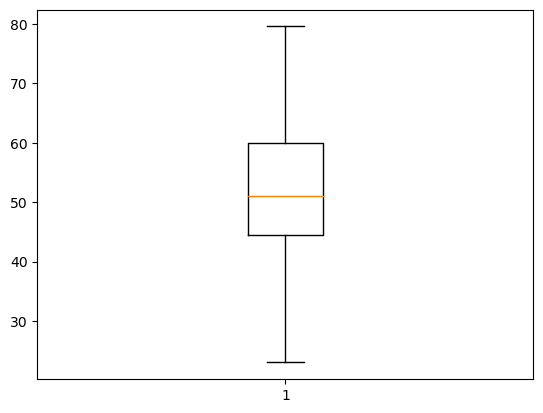

In [18]:
plt.boxplot(Df_imputed['Age'])
plt.show()

In [19]:
Df_imputed["RelapseFreeSurvival (outcome)"].count()

400

In [20]:
Df_imputed.to_excel("preprocessed_dataregression_final.xlsx") 

As our data does not have string categorical values, there is no need to perform any encoding such as (OneHot encoding)

In [21]:
X = Df_imputed.drop(['RelapseFreeSurvival (outcome)'], axis=1)
y = Df_imputed['RelapseFreeSurvival (outcome)']

Random Forest Regressor is considered good for feature selection due to the following reasons:
1. Importance ranking: Random Forest Regressor assigns an importance score to each feature based on how much it contributes to the predictive performance of the model. This score is calculated by measuring the decrease in model performance when a particular feature is randomly shuffled. Features with higher importance scores are considered more relevant for prediction, while features with lower scores are considered less important. This ranking allows you to identify the most influential features in your dataset.
2. Random Forest handles non-linear relationships: Random Forest Regressor can capture complex non-linear relationships between features and the target variable. 
3. Random Forest handles high-dimensional data. As our data has 120 features, it needs to be handled effectively. This allows you to focus on the most informative features and avoid overfitting caused by using too many irrelevant features.

Overall, Random Forest Regressor's ability to rank feature importance, handle non-linear relationships, handle noise and outliers, and handle high-dimensional data make it a popular choice for feature selection in regression problems. It can help identify the most relevant features for accurate predictions and improve the interpretability of the model.

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [23]:
#Random forest algorithm does not require any scaling so we are not performing any scaling here

In [24]:
# Create a random forest regressor model
rf_model = RandomForestRegressor()

In [25]:
# Fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
pickle.dump(rf_model, open('RF_feature_selection.pkl', 'wb'))

In [27]:
# Get feature importances
importances = rf_model.feature_importances_

In [28]:
# Sort feature importances in descending order
indices = (-importances).argsort()

In [29]:
# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i+1}. Feature '{X.columns[idx]}' with importance: {importances[idx]}")

Feature ranking:
1. Feature 'original_firstorder_Kurtosis' with importance: 0.05510470152605795
2. Feature 'original_firstorder_Range' with importance: 0.04698628865012044
3. Feature 'original_firstorder_Variance' with importance: 0.03330954424019979
4. Feature 'original_firstorder_Skewness' with importance: 0.032010548596237066
5. Feature 'Age' with importance: 0.03024069319061367
6. Feature 'original_shape_MinorAxisLength' with importance: 0.028898985261354357
7. Feature 'original_glszm_SizeZoneNonUniformity' with importance: 0.027399796117440284
8. Feature 'original_firstorder_RobustMeanAbsoluteDeviation' with importance: 0.025360266435637487
9. Feature 'original_shape_Elongation' with importance: 0.023859022222655853
10. Feature 'original_firstorder_90Percentile' with importance: 0.02244411579869
11. Feature 'original_shape_Maximum2DDiameterRow' with importance: 0.022142005237018675
12. Feature 'original_firstorder_MeanAbsoluteDeviation' with importance: 0.021798934922080473
13. Fe

In [30]:
# Select features with importance greater than 0.025
selected_features = X.columns[importances > 0.025]

In [31]:
# Filter the dataset to include only the selected features
X_selected = X[selected_features]

In [32]:
# Print the selected features
print("Selected Features:")
print(X_selected.columns)

Selected Features:
Index(['Age', 'original_shape_MinorAxisLength', 'original_firstorder_Kurtosis',
       'original_firstorder_Range',
       'original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_Skewness', 'original_firstorder_Variance',
       'original_glszm_SizeZoneNonUniformity'],
      dtype='object')


In [33]:
data_correlation = X_selected.corr()
data_correlation

Age  \
Age                                              1.000000   
original_shape_MinorAxisLength                  -0.039905   
original_firstorder_Kurtosis                    -0.237100   
original_firstorder_Range                        0.003989   
original_firstorder_RobustMeanAbsoluteDeviation  0.184021   
original_firstorder_Skewness                     0.046479   
original_firstorder_Variance                     0.120923   
original_glszm_SizeZoneNonUniformity            -0.005217   

                                                 original_shape_MinorAxisLength  \
Age                                                                   -0.039905   
original_shape_MinorAxisLength                                         1.000000   
original_firstorder_Kurtosis                                           0.213189   
original_firstorder_Range                                              0.566847   
original_firstorder_RobustMeanAbsoluteDeviation                        0.120234   
original_firstorder_Skewness                                           0.251225   
original_firstorder_Variance                                           0.222845   
original_glszm_SizeZoneNonUniformity                                   0.488662   

                                                 original_firstorder_Kurtosis  \
Age                                                                 -0.237100   
original_shape_MinorAxisLength                                       0.213189   
original_firstorder_Kurtosis                                         1.000000   
original_firstorder_Range                                            0.073074   
original_firstorder_RobustMeanAbsoluteDeviation                     -0.528313   
original_firstorder_Skewness                                        -0.006455   
original_firstorder_Variance                                        -0.304241   
original_glszm_SizeZoneNonUniformity                                 0.012039   

                                                 original_firstorder_Range  \
Age                                                               0.003989   
original_shape_MinorAxisLength                                    0.566847   
original_firstorder_Kurtosis                                      0.073074   
original_firstorder_Range                                         1.000000   
original_firstorder_RobustMeanAbsoluteDeviation                   0.662713   
original_firstorder_Skewness                                      0.532942   
original_firstorder_Variance                                      0.784092   
original_glszm_SizeZoneNonUniformity                              0.332502   

                                                 original_firstorder_RobustMeanAbsoluteDeviation  \
Age                                                                                     0.184021   
original_shape_MinorAxisLength                                                          0.120234   
original_firstorder_Kurtosis                                                           -0.528313   
original_firstorder_Range                                                               0.662713   
original_firstorder_RobustMeanAbsoluteDeviation                                         1.000000   
original_firstorder_Skewness                                                            0.417489   
original_firstorder_Variance                                                            0.938349   
original_glszm_SizeZoneNonUniformity                                                    0.107124   

                                                 original_firstorder_Skewness  \
Age                                                                  0.046479   
original_shape_MinorAxisLength                                       0.251225   
original_firstorder_Kurtosis                                        -0.006455   
original_firstorder_Range                                            0.532942   
original_firstord

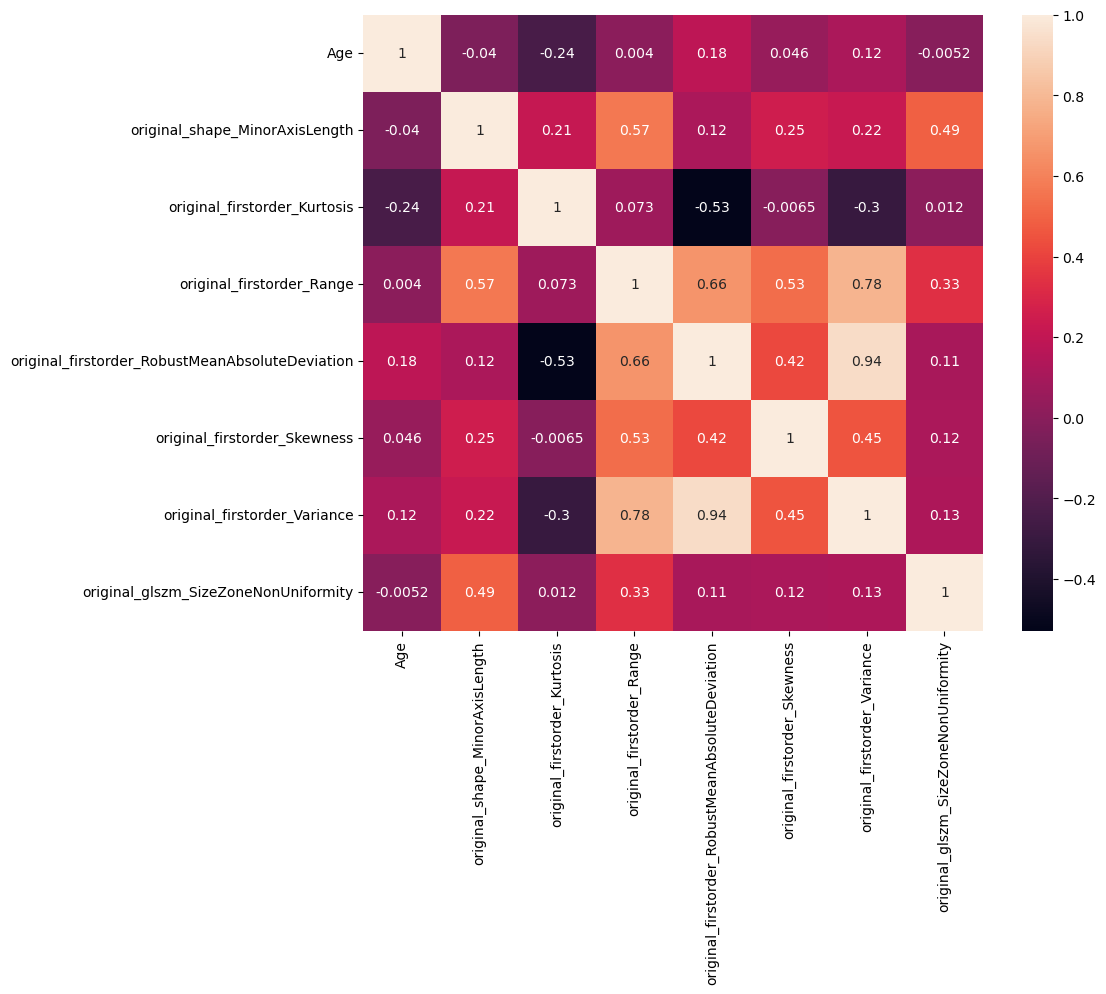

In [34]:
plt.subplots(figsize=(10, 8))
sns.heatmap(data_correlation, annot=True)
plt.show()

**SELECTED MODEL**

**Using SVR for regression**

As the Random forest algorthm was not giving good results for regression, we use SVR to see if that works better.

Support Vector Regression (SVR) is a popular choice for regression due to its ability to handle non-linear relationships, robustness to outliers, flexibility in kernel selection, and regularization to prevent overfitting. SVR can capture complex patterns and provide accurate predictions by transforming the input features using the kernel trick. It is less affected by outliers, as it focuses on fitting the majority of data within a given tolerance. The choice of kernel allows SVR to handle different types of relationships. Regularization techniques help generalize the model, and support vectors offer interpretability. SVR is effective in high-dimensional spaces, making it suitable for diverse regression tasks.

In [183]:
# Split the data into training and testing sets from selected data from Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=62)

In [184]:
X_train.shape

(320, 8)

In [185]:
# Create a scaler object
scaler = MinMaxScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
# Create an SVR model
svr_model = SVR()

In [187]:
# Define the hyperparameters to tune
parameters = {
    'kernel': ['linear', 'rbf'],  
    'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 20, 25],  
    'gamma': ['scale', 'auto']
}

In [188]:
# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svr_model, param_grid=parameters, cv=30)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=30, estimator=SVR(),
             param_grid={'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15,
                               20, 25],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [189]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [190]:
pickle.dump(best_model, open('svr_gridsearch_optimised_using_rf_for_fs.pkl', 'wb'))

In [191]:
# Predict the target variable for the test data using the best model
y_pred = best_model.predict(X_test_scaled)

In [192]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Best Hyperparameters:", best_params)

Mean Squared Error: 549.5702131125488
Best Hyperparameters: {'C': 25, 'gamma': 'auto', 'kernel': 'rbf'}


In [193]:
# Calculate the root mean squared error
rmse = mse ** 0.5

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 23.442913921109483


In [194]:
# Calculate evaluation metric (MAE)
mae_svr = mean_absolute_error(y_test, y_pred)

In [195]:
# Print the evaluation metric
print("Mean Absolute Error (MAE):", mae_svr)

Mean Absolute Error (MAE): 18.7882805155843


**Other models and methods tried for regression**

Random Forest Regressor

In [48]:
# Split the data into training and testing sets from selected data from Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [49]:
#Random forest does not require any scaling hence we are not performing any scaling here

In [50]:
print("Shape of Training Data :",X_train.shape)
print("Shape of Validation Data :",X_test.shape)
print("Shape of Training Labels :",y_train.shape)
print("Shape of Validation Labels :",y_test.shape)

Shape of Training Data : (320, 8)
Shape of Validation Data : (80, 8)
Shape of Training Labels : (320,)
Shape of Validation Labels : (80,)


In [51]:
# Create a random forest regressor model
rf_model2 = RandomForestRegressor()

In [52]:
# Fit the model on the training data
rf_model2.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
# Predict the target variable for the test data
y_pred = rf_model2.predict(X_test)

In [54]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 809.5888730121528


In [55]:
# Calculate the root mean squared error
rmse = mse ** 0.5

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 28.453275259838765


In [56]:
# Calculate evaluation metric (MAE)
mae = mean_absolute_error(y_test, y_pred)

In [57]:
# Print the evaluation metric
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 22.976177083333333


The regression results obtained from the Random forest are not upto the mark for regression. In order to fine tune the model more, we use gridSearch for hyperparameter tuning.

In [58]:
# Create a random forest regressor model with gridSearch
rf_model3 = RandomForestRegressor()

In [59]:
# Define the hyperparameters to tune
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],  # number of trees in the forest
    'max_depth': [None, 4, 5, 7, 10, 20],  # maximum depth of the tree
    'min_samples_split': [2, 5, 5, 7, 10, 20],  # minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 5, 7, 20]  # minimum number of samples required at each leaf node
}

In [60]:
# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters,scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 7, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 5, 7, 20],
                         'min_samples_split': [2, 5, 5, 7, 10, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_absolute_error')

In [61]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [62]:
pickle.dump(best_model, open('RF_gridsearch_optimised_using_rf_for_fs.pkl', 'wb'))

In [63]:
# Predict the target variable for the test data using the best model
y_pred = best_model.predict(X_test)

In [64]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Best Hyperparameters:", best_params)

Mean Squared Error: 804.8770403973331
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 100}


In [65]:
# Calculate the root mean squared error
rmse = mse ** 0.5

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 28.37035495719666


In [66]:
# Calculate evaluation metric (MAE)
mae_rf = mean_absolute_error(y_test, y_pred)

In [67]:
# Print the evaluation metric
print("Mean Absolute Error (MAE):", mae_rf)

Mean Absolute Error (MAE): 22.649918087324103


**MLP Regression using features selected using Random Forest**

In [68]:
#Split the data into training and testing sets from selected data from Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=62)

In [69]:
#Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [70]:
#Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50),(70,30)],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

In [71]:
#Perform grid search
mlp = MLPRegressor(random_state=42)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)



GridSearchCV(estimator=MLPRegressor(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (70, 30)]},
             scoring='neg_mean_squared_error')

In [72]:
#Retrieve the best hyperparameters
best_hidden_layer_sizes = grid_search.best_params_['hidden_layer_sizes']
best_alpha = grid_search.best_params_['alpha']
print("Best Hidden Layer Sizes:", best_hidden_layer_sizes)
print("Best Alpha:", best_alpha)


Best Hidden Layer Sizes: (50, 50)
Best Alpha: 0.01


In [73]:
#Fit MLP regression with the best hyperparameters
mlp_best = MLPRegressor(hidden_layer_sizes=(best_hidden_layer_sizes), alpha=best_alpha, random_state=42)
mlp_best.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(50, 50), random_state=42)

In [74]:
pickle.dump(mlp_best, open('mlp_regression_using_rf_for_fs.pkl', 'wb'))

In [75]:
# Predict on the test set
y_pred = mlp_best.predict(X_test_scaled)

In [76]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 579.376506515352


In [77]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [78]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 579.376506515352
Root Mean Squared Error: 24.070241097989694


In [79]:
# Calculate evaluation metric (MAE)
mae_mlp = mean_absolute_error(y_test, y_pred)

In [80]:
# Print the evaluation metric
print("Mean Absolute Error (MAE):", mae_mlp)

Mean Absolute Error (MAE): 19.04653346456193


**XGBoost for regression on data features selected by random forest regressor**

In [196]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=62)

In [197]:
# Create a scaler object
scaler = MinMaxScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [198]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [199]:
# Perform hyperparameter tuning using GridSearchCV
xgb_model_tuned = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_model_tuned, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'max_depth': [2, 3, 5, 7, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [200]:
# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

In [201]:
pickle.dump(best_xgb_model, open('xgb_regressor_rf_feature_selection.pkl', 'wb'))

In [202]:
# Predict the target variable for the test data
y_pred = best_xgb_model.predict(X_test_scaled)

In [203]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [204]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 528.1187201886179
Root Mean Squared Error: 22.980833757473157


In [205]:
# Calculate evaluation metric (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred)

# Print the evaluation metric
print("Mean Absolute Error (MAE):", mae_xgb)

Mean Absolute Error (MAE): 18.521412754058836


**Using selectKBest for feature selection and XGBoost for regression**

In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [92]:
# Create a scaler object
scaler = MinMaxScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
# Perform feature selection using SelectKBest
k_best_selector = SelectKBest(f_regression, k=5)
X_train_selected_skb = k_best_selector.fit_transform(X_train_scaled, y_train)
X_test_selected_skb = k_best_selector.transform(X_test_scaled)

In [94]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

In [95]:
# Perform hyperparameter tuning using GridSearchCV
xgb_model_tuned = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_model_tuned, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_selected_skb, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 5, 7, 9],
                         'n_estimators': [50, 100, 200, 300],
                         'reg_alpha': [0, 0.1, 0.5],
                         'reg_lambda': [0, 0.1, 0.5],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [96]:
# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

In [97]:
pickle.dump(best_xgb_model, open('xgb_using_selectKbest_for_fs.pkl', 'wb'))

In [98]:
# Predict the target variable for the test data
y_pred = best_xgb_model.predict(X_test_selected_skb)

In [99]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [100]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 525.0120976943329
Root Mean Squared Error: 22.913142466591808


In [101]:
# Calculate evaluation metric (MAE)
mae = mean_absolute_error(y_test, y_pred)

In [102]:
# Print the evaluation metric
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 18.481542746225994


**Lasso**

We are trying our Lasso regression for feature selection to see if that gives us the better results

In [103]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [104]:
# Create a scaler object
scaler = MinMaxScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
# Perform feature selection using LassoCV
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
selected_features = lasso_model.coef_ != 0
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

In [106]:
# Perform Lasso regression on selected features
lasso_selected = Lasso(alpha=0.1)  # You can adjust the alpha parameter as per your requirement
lasso_selected.fit(X_train_selected, y_train)

Lasso(alpha=0.1)

In [107]:
# Predict on the test set using selected features
y_pred = lasso_selected.predict(X_test_selected)

In [108]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 555.4334213527851


In [109]:
# Calculate the root mean squared error
rmse = mse ** 0.5

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 23.567635039451563


In [110]:
# Calculate evaluation metric (MAE)
mae = mean_absolute_error(y_test, y_pred)

In [111]:
# Print the evaluation metric
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 19.243401855126702


**Using cross-validation to select the right alpha value for lasso**

In this updated code, after scaling the features, we perform Lasso regression for feature selection using cross-validation to identify the best alpha value. We then select the features based on non-zero coefficients obtained from Lasso. Next, we fit a Lasso regression model on the selected features and predict on the test set. Finally, we evaluate the model's performance using mean squared error. Additionally, we plot the coefficient paths for different alpha values to visualize the impact of regularization on the coefficients.

In [112]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [113]:
# Create a scaler object
scaler = MinMaxScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
# Define the alpha values to evaluate
alphas = [0.01, 0.1, 1]

# Perform cross-validation
cv_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_scores.append((-1) * scores.mean())

# Find the alpha value with the lowest cross-validation error
best_alpha = alphas[np.argmin(cv_scores)]

In [115]:
best_alpha

1

In [116]:
# Perform feature selection using LassoCV
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train)
selected_features = lasso_model.coef_ != 0
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

In [117]:
selected_features

array([False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [118]:
# Perform Lasso regression on selected features
lasso_selected = Lasso(alpha=best_alpha)  # You can adjust the alpha parameter as per your requirement
lasso_selected.fit(X_train_selected, y_train)

Lasso(alpha=1)

In [119]:
pickle.dump(lasso_selected, open('lasso_regression_using_lasso_fs.pkl', 'wb'))

In [120]:
#  Predict on the test set using selected features
y_pred = lasso_selected.predict(X_test_selected)

In [121]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 542.9868063904175


In [122]:
# Calculate the root mean squared error
rmse = mse ** 0.5

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 23.30207729775218


In [123]:
# Calculate evaluation metric (MAE)
mae_lasso = mean_absolute_error(y_test, y_pred)

In [124]:
# Print the evaluation metric
print("Mean Absolute Error (MAE):", mae_lasso)

Mean Absolute Error (MAE): 18.801837397309708


 A plot will be displayed showing the coefficient paths for different alpha values, allowing you to visualize the regularization effect on the coefficients.

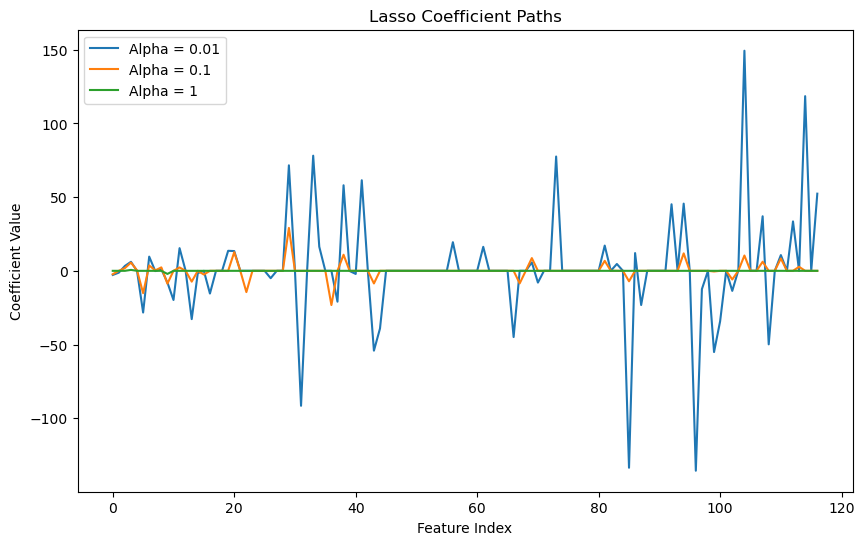

In [125]:
# Plot coefficient paths
coefficients = []
for alpha in alphas:
    lasso.alpha = alpha
    lasso.fit(X_train_scaled, y_train)
    coefficients.append(lasso.coef_)

plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alphas):
    plt.plot(coefficients[i], label=f'Alpha = {alpha}')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.title('Lasso Coefficient Paths')
plt.show()

**JUST EXPERIMENTING**

**Using RFE for feature selection**

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [127]:
# Create a scaler object
scaler = MinMaxScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
# Perform feature selection using RFE
rf_model = RandomForestRegressor()
rfe_selector = RFE(estimator=rf_model, n_features_to_select=5, step=1)
rfe_selector.fit(X_train_scaled, y_train)
X_train_selected = rfe_selector.transform(X_train_scaled)
X_test_selected = rfe_selector.transform(X_test_scaled)

In [129]:
X_train_selected.shape

(320, 5)

5 features are selected

In [130]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['friedman_mse', 'friedman_mse']
}

In [131]:
# Perform hyperparameter tuning using GridSearchCV
rf_model_tuned = RandomForestRegressor()
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['friedman_mse', 'friedman_mse'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [132]:
# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

In [133]:
pickle.dump(best_rf_model, open('random_forest_regressor_using_rfe_for_fs.pkl', 'wb'))

In [134]:
# Predict the target variable for the test data
y_pred = best_rf_model.predict(X_test_selected)

In [135]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [136]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 534.3547551659663
Root Mean Squared Error: 23.116114620886577


In [137]:
# Calculate evaluation metric (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metric
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 18.856763868841806


In [211]:
mae_values = [mae_svr, mae_rf, mae_mlp, mae_xgb, mae_lasso]

rounded_mae_values = []

for var in mae_values:
    rounded_var = round(var, 2)
    rounded_mae_values.append(rounded_var)

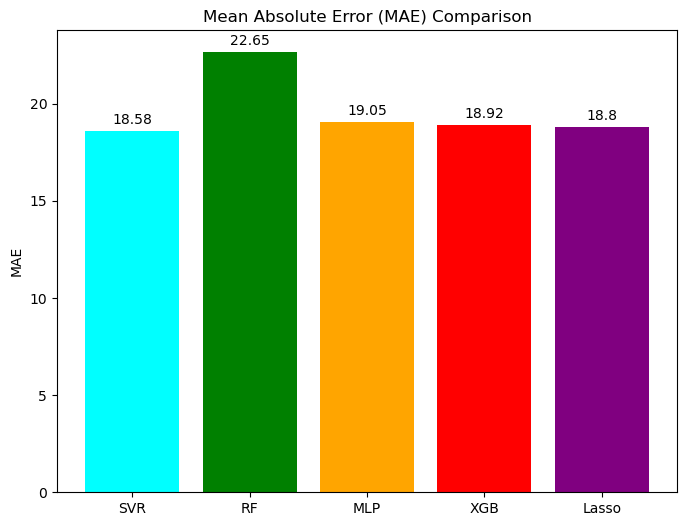

In [213]:

models = ['SVR', 'RF', 'MLP', 'XGB', 'Lasso']

# Define colors for each bar
colors = ['cyan', 'green', 'orange', 'red', 'purple']

# Create a figure and axis for bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar plot
bars = ax.bar(models, rounded_mae_values, color=colors)

# Add value labels to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

ax.set_ylabel('MAE')
ax.set_title('Mean Absolute Error (MAE) Comparison')

# Show the plot
plt.show()

**END**